In [1]:
# 3.1

In [2]:
import math
import time
import numpy as np
import tensorflow as tf

In [3]:
n = 10000
a = tf.ones(n)
b = tf.ones(n)

In [4]:
class Timer:  #@save
    """记录多次运行时间。"""
    def __init__(self):
        self.times = []
        self.start()

    def start(self):
        """启动计时器。"""
        self.tik = time.time()

    def stop(self):
        """停止计时器并将时间记录在列表中。"""
        self.times.append(time.time() - self.tik)
        return self.times[-1]

    def avg(self):
        """返回平均时间。"""
        return sum(self.times) / len(self.times)

    def sum(self):
        """返回时间总和。"""
        return sum(self.times)

    def cumsum(self):
        """返回累计时间。"""
        return np.array(self.times).cumsum().tolist()

In [5]:
c = tf.Variable(tf.zeros(n))
timer = Timer()
for i in range(n):
    c[i].assign(a[i]+b[i])
f'{timer.stop():.5f} sec'


'3.85649 sec'

In [6]:
a[1]+b[1]

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

In [7]:
a[2]+b[2]

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

In [8]:
c[1]

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

In [9]:
c[1].assign(a[2]+b[2])

<tf.Variable 'UnreadVariable' shape=(10000,) dtype=float32, numpy=array([2., 2., 2., ..., 2., 2., 2.], dtype=float32)>

In [10]:
c[1]

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

In [11]:
# 3.2

In [12]:
import random
import tensorflow as tf


In [13]:
def synthetic_data(w,b,num_examples):
    #y = w* x + b +bias
    X = tf.zeros((num_examples,w.shape[0]))
    #print(X.shape)(1000, 2)
    X += tf.random.normal(shape=X.shape)
    y = tf.matmul(X,tf.reshape(w,(-1,1)))+b
    y += tf.random.normal(shape=y.shape, stddev=0.01)
    y = tf.reshape(y,(-1,1))
    return X ,y 

In [14]:
true_w = tf.constant([2,-3.5])
true_b = 4.6
features ,labels = synthetic_data(true_w,true_b,1000)

In [15]:
features.shape

TensorShape([1000, 2])

In [16]:
labels.shape

TensorShape([1000, 1])

In [17]:
print('features:',features[0],'\nlabels:',labels[0])

features: tf.Tensor([-0.45491752 -0.24159662], shape=(2,), dtype=float32) 
labels: tf.Tensor([4.540099], shape=(1,), dtype=float32)


In [18]:
tf.zeros((2,2))

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0., 0.],
       [0., 0.]], dtype=float32)>

In [19]:
tf.constant([2,-3.5]).shape[0]

2

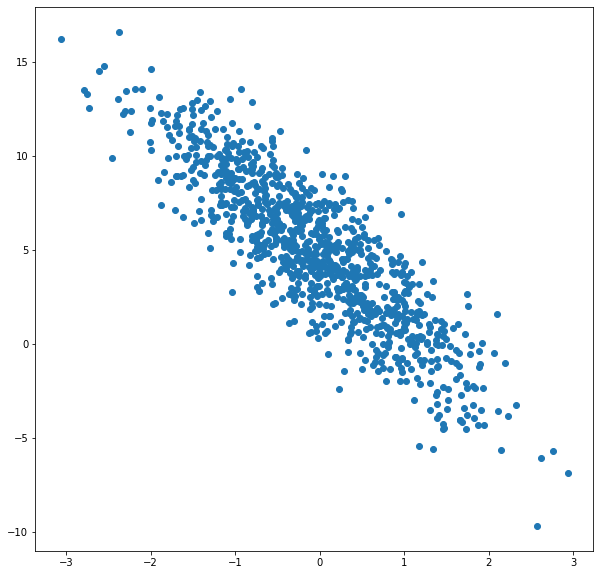

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.scatter(features[:,(1)].numpy(),labels.numpy())

In [21]:
def data_iter(batch_size,features,labels):
    num_example = len(features)
    indices = list(range(num_example))
    
    random.shuffle(indices)
    for i in range(0,num_example,batch_size):
        j = tf.constant(indices[i:min(i+batch_size,num_example)])
        yield tf.gather(features,j),tf.gather(labels,j)

In [22]:
batch_size = 10

for X,y in data_iter(batch_size,features,labels):
    print(X,y)
    break

tf.Tensor(
[[ 2.6064644  -0.15799592]
 [-0.25734457 -0.8734729 ]
 [-1.0142124  -0.06909899]
 [ 0.8206336  -0.90861547]
 [-0.47083953  0.5288233 ]
 [-1.468587    0.04547582]
 [ 0.4028744  -0.8593114 ]
 [-0.73264307  1.8164216 ]
 [ 0.81851697  0.38416675]
 [ 0.580778   -0.7177197 ]], shape=(10, 2), dtype=float32) tf.Tensor(
[[10.348166 ]
 [ 7.1493526]
 [ 2.8089488]
 [ 9.424268 ]
 [ 1.8028642]
 [ 1.5037091]
 [ 8.410817 ]
 [-3.2313404]
 [ 4.886865 ]
 [ 8.266964 ]], shape=(10, 1), dtype=float32)


In [23]:
w = tf.Variable(tf.random.normal(shape=(2,1),mean=0,stddev=0.01),trainable=True)
b = tf.Variable(tf.zeros(1),trainable=True)

In [24]:
def linreg(X,w,b):
    return tf.matmul(X,w)+b

In [25]:
def squared_loss(y_hat,y):
    return (y_hat - tf.reshape(y,y_hat.shape))**2/2

In [26]:
def sgd(params,grads,lr,batch_size):
    for param,grad in zip(params,grads):
        param.assign_sub(lr*grad/batch_size)

In [27]:
lr = 0.03
num_epochs = 10
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X,y in data_iter(batch_size,features,labels):
        with tf.GradientTape() as g:
            l = loss(net(X,w,b),y)
        dw,db = g.gradient(l,[w,b])
        sgd([w,b],[dw,db],lr,batch_size)
    train_l = loss(net(features,w,b),labels)
    print(f'epoch {epoch + 1}, loss {float(tf.reduce_mean(train_l)):f}')


epoch 1, loss 0.030007
epoch 2, loss 0.000104
epoch 3, loss 0.000049
epoch 4, loss 0.000049
epoch 5, loss 0.000049
epoch 6, loss 0.000049
epoch 7, loss 0.000049
epoch 8, loss 0.000049
epoch 9, loss 0.000049
epoch 10, loss 0.000049


In [28]:
print(f'w的估计误差: {true_w - tf.reshape(w, true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: [-0.00018549 -0.00068545]
b的估计误差: [-0.00037622]


In [29]:
# 3.3

In [30]:
import numpy as np
import tensorflow as tf

In [31]:
true_w = tf.constant([2,3],dtype=tf.float32)
true_b = 5
num_inputs = 1000
features,labels = synthetic_data(true_w,true_b,num_inputs)

In [32]:
def load_array(data_arrays,batch_size,is_train = True):
    dataset = tf.data.Dataset.from_tensor_slices(data_arrays)
    if is_train:
        dataset = dataset.shuffle(buffer_size = 1000)
    dataset = dataset.batch(batch_size)
    return dataset

batch_size=10
data_iter = load_array((features,labels),batch_size)

In [33]:
next(iter(data_iter))

(<tf.Tensor: shape=(10, 2), dtype=float32, numpy=
 array([[-0.43565413, -0.35237935],
        [-0.59054744,  0.45491958],
        [-1.6805884 ,  0.8058796 ],
        [ 0.26206163, -0.47171876],
        [-1.5077522 ,  0.5261318 ],
        [ 0.8173348 ,  0.46564293],
        [-0.46671212, -0.05084534],
        [-1.9895322 ,  1.5966818 ],
        [-0.20597138,  0.69490576],
        [ 0.28691578,  1.3717147 ]], dtype=float32)>,
 <tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[3.0636535],
        [5.172082 ],
        [4.0605407],
        [4.110445 ],
        [3.5649147],
        [8.030749 ],
        [3.9052434],
        [5.795655 ],
        [6.6631503],
        [9.689436 ]], dtype=float32)>)

In [34]:
# 定义模型
net = tf.keras.Sequential()
net.add(tf.keras.layers.Dense(1))

In [35]:
# 初始化模型参数
initializer = tf.initializers.RandomNormal(stddev=0.01)
net = tf.keras.Sequential()
net.add(tf.keras.layers.Dense(1,kernel_initializer=initializer))

In [36]:
loss = tf.keras.losses.MeanSquaredError()

In [37]:
trainer = tf.keras.optimizers.SGD(learning_rate=0.01)

In [38]:
num_epochs = 5
for epoch in range(num_epochs):
    for X,y in data_iter:
        with tf.GradientTape() as tape:
            l = loss(net(X,training = True),y)
        grads = tape.gradient(l,net.trainable_variables)
        trainer.apply_gradients(zip(grads,net.trainable_variables))
    l = loss(net(features),labels)
    print(f'epoch {epoch+1},loss {l:f}')

epoch 1,loss 0.594167
epoch 2,loss 0.009274
epoch 3,loss 0.000248
epoch 4,loss 0.000104
epoch 5,loss 0.000102


In [39]:
w = net.get_weights()[0]
print('w的估计误差：', true_w - tf.reshape(w, true_w.shape))
b = net.get_weights()[1]
print('b的估计误差：', true_b - b)

w的估计误差： tf.Tensor([ 0.00012326 -0.00077271], shape=(2,), dtype=float32)
b的估计误差： [0.00013876]


In [40]:
# 3.4

In [41]:
import tensorflow as tf

In [42]:
from IPython import display

def use_svg_display():
    """使用svg格式在Jupyter中显示绘图。
    Defined in :numref:`sec_calculus`"""
    display.set_matplotlib_formats('svg')
use_svg_display()

In [43]:
mnist_train, mnist_test = tf.keras.datasets.fashion_mnist.load_data()

In [44]:
len(mnist_train[0]), len(mnist_test[0])

(60000, 10000)

In [45]:
mnist_train[0][0].shape

(28, 28)

In [46]:
def get_fashion_mnist_labels(labels):  #@save
    """返回Fashion-MNIST数据集的文本标签。"""
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

In [47]:
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):
    figsize = (num_cols * scale, num_rows * scale)
    print(figsize)
    _,axes = plt.subplots(num_rows,num_cols,figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes

(13.5, 3.0)


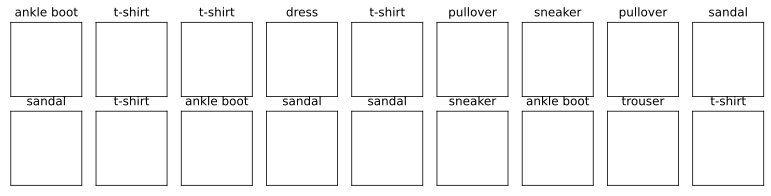

In [48]:
X = tf.constant(mnist_train[0][:18])
y = tf.constant(mnist_train[1][:18])
show_images(X, 2, 9, titles=get_fashion_mnist_labels(y));

In [49]:
batch_size = 256
train_iter = tf.data.Dataset.from_tensor_slices(mnist_train).batch(batch_size).shuffle(len(mnist_train[0]))

In [50]:
train_iter

<ShuffleDataset shapes: ((None, 28, 28), (None,)), types: (tf.uint8, tf.uint8)>

In [51]:
timer = Timer()
for X,y in train_iter:
    continue
f'{timer.stop():.2f} sec'

'0.11 sec'

In [52]:
def load_data_fashion_mnist(batch_size, resize=None):   #@save
    """下载Fashion-MNIST数据集，然后将其加载到内存中。"""
    mnist_train, mnist_test = tf.keras.datasets.fashion_mnist.load_data()
    # 将所有数字除以255，使所有像素值介于0和1之间，在最后添加一个批处理维度，
    # 并将标签转换为int32。
    process = lambda X, y: (tf.expand_dims(X, axis=3) / 255,
                            tf.cast(y, dtype='int32'))
    resize_fn = lambda X, y: (
        tf.image.resize_with_pad(X, resize, resize) if resize else X, y)
    return (
        tf.data.Dataset.from_tensor_slices(process(*mnist_train)).batch(
            batch_size).shuffle(len(mnist_train[0])).map(resize_fn),
        tf.data.Dataset.from_tensor_slices(process(*mnist_test)).batch(
            batch_size).map(resize_fn))

In [53]:
train_iter, test_iter = load_data_fashion_mnist(32, resize=64)
for X, y in train_iter:
    print(X.shape, X.dtype, y.shape, y.dtype)
    break

(32, 64, 64, 1) <dtype: 'float32'> (32,) <dtype: 'int32'>


In [54]:
#3.6

In [55]:
import tensorflow as tf
from IPython import display


batch_size = 256
train_iter, test_iter = load_data_fashion_mnist(batch_size)

In [56]:
num_inputs = 784
num_outputs = 10

W = tf.Variable(tf.random.normal(shape=(num_inputs, num_outputs),
                                 mean=0, stddev=0.01))
b = tf.Variable(tf.zeros(num_outputs))

In [57]:
X = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
tf.reduce_sum(X, 0, keepdims=True), tf.reduce_sum(X, 1, keepdims=True)

(<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[5., 7., 9.]], dtype=float32)>,
 <tf.Tensor: shape=(2, 1), dtype=float32, numpy=
 array([[ 6.],
        [15.]], dtype=float32)>)

In [58]:
def softmax(X):
    X_exp = tf.exp(X)
    partition = tf.reduce_sum(X_exp, 1, keepdims=True)
    return X_exp / partition  # 这里应用了广播机制

In [59]:
X = tf.random.normal((2, 5), 0, 1)
X_prob = softmax(X)
X_prob, tf.reduce_sum(X_prob, 1)

(<tf.Tensor: shape=(2, 5), dtype=float32, numpy=
 array([[0.06849821, 0.75479   , 0.07249724, 0.07015696, 0.03405759],
        [0.09387044, 0.09832016, 0.16341332, 0.11630533, 0.5280907 ]],
       dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([1.        , 0.99999994], dtype=float32)>)

In [60]:
def net(X):
    return softmax(tf.matmul(tf.reshape(X, (-1, W.shape[0])), W) + b)

In [61]:
y_hat = tf.constant([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y = tf.constant([0, 2])
tf.boolean_mask(y_hat, tf.one_hot(y, depth=y_hat.shape[-1]))

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.1, 0.5], dtype=float32)>

In [62]:
def cross_entropy(y_hat, y):
    return -tf.math.log(tf.boolean_mask(
        y_hat, tf.one_hot(y, depth=y_hat.shape[-1])))

cross_entropy(y_hat, y)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([2.3025851, 0.6931472], dtype=float32)>

In [63]:
def accuracy(y_hat, y):  #@save
    """计算预测正确的数量。"""
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = tf.argmax(y_hat, axis=1)
    cmp = tf.cast(y_hat, y.dtype) == y
    return float(tf.reduce_sum(tf.cast(cmp, y.dtype)))

In [64]:
accuracy(y_hat, y) / len(y)

0.5

In [65]:
size = lambda a: tf.size(a).numpy()

def evaluate_accuracy(net, data_iter):  #@save
    """计算在指定数据集上模型的精度。"""
    metric = Accumulator(2)  # 正确预测数、预测总数
    for X, y in data_iter:
        metric.add(accuracy(net(X), y), size(y))
    return metric[0] / metric[1]

In [66]:
class Accumulator:  #@save
    """在`n`个变量上累加。"""
    def __init__(self, n):
        self.data = [0.0] * n

    def add(self, *args):
        self.data = [a + float(b) for a, b in zip(self.data, args)]

    def reset(self):
        self.data = [0.0] * len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

In [67]:
evaluate_accuracy(net, test_iter)

0.0471

In [68]:
def train_epoch_ch3(net, train_iter, loss, updater):  #@save
    """训练模型一个迭代周期（定义见第3章）。"""
    # 训练损失总和、训练准确度总和、样本数
    metric = Accumulator(3)
    for X, y in train_iter:
        # 计算梯度并更新参数
        with tf.GradientTape() as tape:
            y_hat = net(X)
            # Keras内置的损失接受的是（标签，预测），这不同于用户在本书中的实现。
            # 本书的实现接受（预测，标签），例如我们上面实现的“交叉熵”
            if isinstance(loss, tf.keras.losses.Loss):
                l = loss(y, y_hat)
            else:
                l = loss(y_hat, y)
        if isinstance(updater, tf.keras.optimizers.Optimizer):
            params = net.trainable_variables
            grads = tape.gradient(l, params)
            updater.apply_gradients(zip(grads, params))
        else:
            updater(X.shape[0], tape.gradient(l, updater.params))
        # Keras的`loss`默认返回一个批量的平均损失
        l_sum = l * float(tf.size(y)) if isinstance(
            loss, tf.keras.losses.Loss) else tf.reduce_sum(l)
        metric.add(l_sum, accuracy(y_hat, y), tf.size(y))
    # 返回训练损失和训练准确率
    return metric[0] / metric[2], metric[1] / metric[2]

In [69]:
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """设置matplotlib的轴。
    Defined in :numref:`sec_calculus`"""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

In [70]:
class Animator:  #@save
    """在动画中绘制数据。"""
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1,
                 figsize=(3.5, 2.5)):
        # 增量地绘制多条线
        if legend is None:
            legend = []
        use_svg_display()
        self.fig, self.axes = plt.subplots(nrows, ncols, figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes, ]
        # 使用lambda函数捕获参数
        self.config_axes = lambda: set_axes(
            self.axes[0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
        self.X, self.Y, self.fmts = None, None, fmts

    def add(self, x, y):
        # 向图表中添加多个数据点
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)

In [77]:
def train_ch3(net, train_iter, test_iter, loss, num_epochs, updater):  #@save
    """训练模型（定义见第3章）。"""
    animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 0.9],
                        legend=['train loss', 'train acc', 'test acc'])
    for epoch in range(num_epochs):
        train_metrics = train_epoch_ch3(net, train_iter, loss, updater)
        test_acc = evaluate_accuracy(net, test_iter)
        animator.add(epoch + 1, train_metrics + (test_acc,))
        print('test_acc:',test_acc)
    train_loss, train_acc = train_metrics
    print('train_loss:',train_loss, '\ntrain_acc:', train_acc)
    assert train_loss < 0.5, train_loss
    assert train_acc <= 1 and train_acc > 0.7, train_acc
    assert test_acc <= 1 and test_acc > 0.7, test_acc

In [78]:
class Updater():  #@save
    """用小批量随机梯度下降法更新参数。"""
    def __init__(self, params, lr):
        self.params = params
        self.lr = lr

    def __call__(self, batch_size, grads):
        sgd(self.params, grads, self.lr, batch_size)

updater = Updater([W, b], lr=0.1)

test_acc: 0.8344
train_loss: 0.4199990338643392 
train_acc: 0.8568166666666667


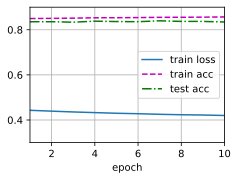

In [79]:
num_epochs = 10
train_ch3(net, train_iter, test_iter, cross_entropy, num_epochs, updater)

In [80]:
numpy = lambda x, *args, **kwargs: x.numpy(*args, **kwargs)
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):
    """绘制图像列表。
    Defined in :numref:`sec_fashion_mnist`"""
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        ax.imshow(numpy(img))
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes

In [81]:
def predict_ch3(net, test_iter, n=6):
    """预测标签（定义见第3章）。
    Defined in :numref:`sec_softmax_scratch`"""
    for X, y in test_iter:
        break
    trues = get_fashion_mnist_labels(y)
    preds = get_fashion_mnist_labels(tf.argmax(net(X), axis=1))
    titles = [true +'\n' + pred for true, pred in zip(trues, preds)]
    show_images(
        tf.reshape(X[0:n], (n, 28, 28)), 1, n, titles=titles[0:n])

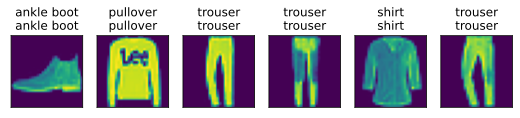

In [82]:
predict_ch3(net, test_iter)

In [83]:
# 3.7

In [84]:
import tensorflow as tf

In [85]:
batch_size = 256
train_iter ,test_iter = load_data_fashion_mnist(batch_size)

In [86]:
net = tf.keras.models.Sequential()
net.add(tf.keras.layers.Flatten(input_shape = (28,28)))
weight_initializer = tf.keras.initializers.RandomNormal(mean= 0.5,stddev= 0.01)
net.add(tf.keras.layers.Dense(10,kernel_initializer=weight_initializer))

In [87]:
net.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [88]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [89]:
trainer = tf.keras.optimizers.Adam(learning_rate=0.03)

test_acc: 0.8121
train_loss: 0.48584167620340984 
train_acc: 0.8456166666666667


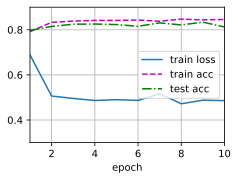

In [90]:
num_epochs = 10
train_ch3(net,train_iter,test_iter,loss,num_epochs,trainer)